# Predicción de precios de propiedades

El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5100, 58)
(1276, 58)
(5100,)
(1276,)


## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

In [4]:
from sklearn.tree import DecisionTreeRegressor

clr=DecisionTreeRegressor()

clr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [5]:
y_pred= clr.predict(X_test)

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error
print('Error en datos de test:', np.sqrt(mean_squared_error(y_test, y_pred)))

Error en datos de test: 25196.852933585502


__Analizamos el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__


In [7]:
rmses_train=list()
rmses_test=list()
for i in range(1,30,5):
    clr=DecisionTreeRegressor(max_depth=i)
    clr.fit(X_train, y_train)
    y_pred_train= clr.predict(X_train)
    y_pred_test= clr.predict(X_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Prof_árbol: ",i," RMSE_Train: ",rmses_train[-1]," RMSE_Test: ",rmses_test[-1])

Prof_árbol:  1  RMSE_Train:  26884.06654887286  RMSE_Test:  26295.14025353065
Prof_árbol:  6  RMSE_Train:  20287.874363151426  RMSE_Test:  21908.872820965524
Prof_árbol:  11  RMSE_Train:  14100.971579882915  RMSE_Test:  22055.69312986431
Prof_árbol:  16  RMSE_Train:  6386.51360970568  RMSE_Test:  24779.31742921491
Prof_árbol:  21  RMSE_Train:  1936.4194382913533  RMSE_Test:  25392.529776080148
Prof_árbol:  26  RMSE_Train:  569.2369612090697  RMSE_Test:  25320.29484328513


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

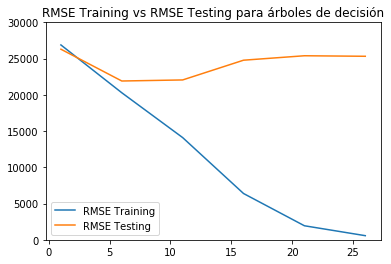

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza.

## KNN

In [9]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)
y_pred2= KNR.predict(X_test)
print('Error en datos de test:', np.sqrt(mean_squared_error(y_test, y_pred2)))


Error en datos de test: 22733.040368844526


__Analizamos el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

In [10]:
# Calculá los cambio en el rmse en esta celda
rmses_train2=list()
rmses_test2=list()
for i in range(1,30,1):
    KNR = KNeighborsRegressor(n_neighbors =i)
    KNR.fit(X_train, y_train)
    y_pred_train= KNR.predict(X_train)
    y_pred_test= KNR.predict(X_test)
    rmses_train2.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmses_test2.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("Prof_árbol: ",i," RMSE_Train: ",rmses_train2[-1]," RMSE_Test: ",rmses_test2[-1])

Prof_árbol:  1  RMSE_Train:  717.7083160050084  RMSE_Test:  26314.375047026846
Prof_árbol:  2  RMSE_Train:  13746.009016313237  RMSE_Test:  24378.43157503682
Prof_árbol:  3  RMSE_Train:  16557.178260577828  RMSE_Test:  23324.776048948213
Prof_árbol:  4  RMSE_Train:  17829.292761243214  RMSE_Test:  23028.274549889524
Prof_árbol:  5  RMSE_Train:  18751.379229464594  RMSE_Test:  22733.040368844526
Prof_árbol:  6  RMSE_Train:  19293.814806681385  RMSE_Test:  22731.27025782464
Prof_árbol:  7  RMSE_Train:  19794.717263196573  RMSE_Test:  22620.31310691122
Prof_árbol:  8  RMSE_Train:  20139.78742144739  RMSE_Test:  22634.689482726375
Prof_árbol:  9  RMSE_Train:  20468.656317131932  RMSE_Test:  22608.863498855015
Prof_árbol:  10  RMSE_Train:  20701.786822437127  RMSE_Test:  22568.211996792175
Prof_árbol:  11  RMSE_Train:  20912.32302589446  RMSE_Test:  22479.91578951748
Prof_árbol:  12  RMSE_Train:  21139.143085959997  RMSE_Test:  22442.04603011599
Prof_árbol:  13  RMSE_Train:  21272.332798820

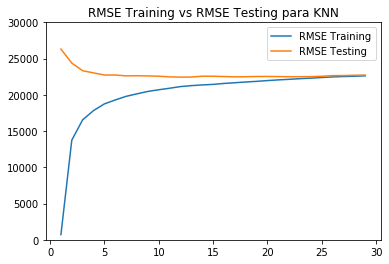

In [11]:
plt.plot(range(1,30, 1), rmses_train2, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test2, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcularemos el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros usaremos:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor= DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)



In [24]:
def nmsq2rmse(scores):
    return np.sqrt(-scores)

In [25]:
scores

array([-4.55379022e+08, -4.47750384e+08, -5.15974353e+08, -4.65436915e+08,
       -5.11563221e+08, -5.34552234e+08, -4.71181433e+08, -4.81852513e+08,
       -4.49061048e+08, -4.99971258e+08])

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [26]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [27]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [28]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,108426.872,28426.872
1,128000.000,151372.531,23372.531
2,150000.000,151372.531,1372.531
3,85000.000,99219.122,14219.122
4,135000.000,130337.039,4662.961
5,135000.000,119967.914,15032.086
6,68000.000,87243.666,19243.666
7,110000.000,128379.238,18379.238
8,134000.000,154167.172,20167.172
9,110000.000,85248.777,24751.223
